Merhabalar, bu dosyada Akbank Makine öğrenmesi için hazırlanan projeye dair kodlar mevcuttur. Proje Sınıflandırma üzerine hazırlanmıştır. İyi okumalar.

Öncelikle excel dosyasını okumak için Google Drive'a eklediğimiz dosyayı bulmak için Drive'a bağlanıyoruz. (Bu şekilde yapmadan dosyayı okuyamadım)

In [7]:
#To read/write data from Google Drive:
#Reference: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveAå
from google.colab import drive
drive.mount('/content/drive')

# #When done,
# drive.flush_and_unmount()
# print('All changes made in this colab session should now be visible in Drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive dosyası içinde ki dosyayı okuduktan sonra excel dosyasını inceliyoruz. Kullandığımız veri seti Meksika, Peru ve Kolombiya için obezite levellerininin bazı sorularla araştırılmasına dayanıyor. Dosyabın içeriği şu şekilde:

Cinsiyet: Gender, Yaş: Age, Boy: Height, Kilo: Weight,
family_history_with_overweight: Aileden biri obezite mi?,
FAVC : Yüksek kalorili yiyecekleri sıklıkla yer misin?,
FCVC : Sebze tüketiyor musunuz?,
NCP : Bir günde ka öğün besleniyorsun?,
CAEC : Öğünler arasında atıştarmalık yiyor musun?,
SMOKE : Sigara kullanıyor musun?,
CH2O: Ne kadar su tüketiyorsun?,
SCC: Kalori takibi yapıyor musun?


In [8]:
import pandas as pd
veri_seti = pd.read_excel('/content/drive/My Drive/Akbank Bootcamp/dataset.xlsx')

# Veri setinin ilk birkaç satırını görüntüle
print("Veri setinin ilk birkaç satırı:")
print(veri_seti.head())

# Sütun isimlerini kontrol et
print("\nSütun isimleri:")
print(veri_seti.columns)

# Veri tiplerini göster
print("\nVeri tipleri:")
print(veri_seti.dtypes)

# İstatistiksel özet
print("\nİstatistiksel özet:")
print(veri_seti.describe())

# Kategorik sütunların frekanslarını göster
print("\nKategorik sütunların frekansları:")
print(veri_seti['Gender'].value_counts())


Veri setinin ilk birkaç satırı:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

      

Veri setini yukarıda ki kodlarla inceleyerek hangi sütunlar var, hangi veriler hangi tipe ait, kaç veri var, min ve max değerleri neler, kategorik değerlerin frekanslarını da görebiliyoruz.

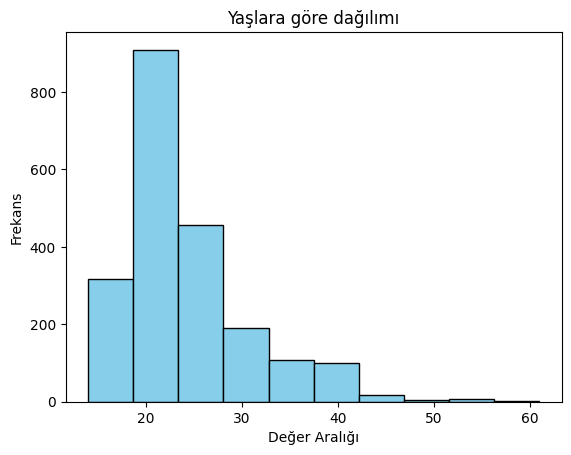

In [4]:
import matplotlib.pyplot as plt

# Histogram oluşturma
plt.hist(veri_seti['Age'], bins=10, color='skyblue', edgecolor='black')

# Grafik başlığı ve eksen etiketleri
plt.title('Yaşlara göre dağılımı')
plt.xlabel('Değer Aralığı')
plt.ylabel('Frekans')

# Histogramı gösterme
plt.show()


Histogram sayesinde soruları cevaplayan kişilerin yaş aralıklarını görebiliyoruz

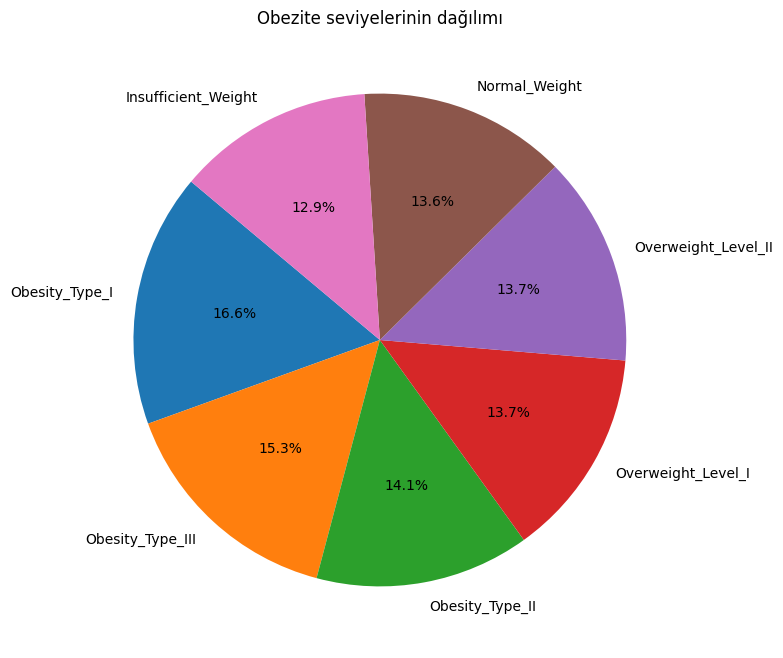

In [5]:
import matplotlib.pyplot as plt

# Veri setindeki kategorik sütunun frekanslarını hesapla
kategori_frekanlari = veri_seti['NObeyesdad'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))  # Grafiğin boyutunu ayarla
plt.pie(kategori_frekanlari, labels=kategori_frekanlari.index, autopct='%1.1f%%', startangle=140)

# Grafiğin başlığını ekle
plt.title('Obezite seviyelerinin dağılımı')

# Pasta grafiğini gösterme
plt.show()


Pasta grafiği sayesinde hangi seviyelerde ne kadar yüzdelikte olduğunu da görebiliyoruz.

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları seçin
kategorik_sutunlar = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']  # Kategorik sütun isimlerini buraya girin

# Label encoding işlemi
label_encoder = LabelEncoder()
for sutun in kategorik_sutunlar:
    veri_seti[sutun + '_encoded'] = label_encoder.fit_transform(veri_seti[sutun])

# Label encoding uygulanan veri setini göster
print(veri_seti.head())


    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  ...  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no  ...   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes  ...   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no  ...   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no  ...   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no  ...   

            NObeyesdad Gender_encoded  CALC_encoded  FAVC_encoded SCC_encoded  \
0        Normal_Weight              0             3             0           0   
1        Normal_Weight              0             2             0           1   
2        Normal_Weight              1             1             0           0   
3   Overweight_Level_I              1             1             0           0   
4  Overweight_Level_II              1             2             0           0   

  SMOKE_encoded family_history_with_ov

Kategorik verileri kodlanmış halde kullanmalıyız ki modellerimiz de herhangi bir sorunla karşılaşmayalım. Bu yüzden LabelEncoder kullandık. 0 dan başlayarak bulduğu kategorik verileri kodlandırıyoruz.

In [ ]:
# Label encoding uygulanan veri setini "label_encoded_veri_seti.xlsx" olarak kaydet
veri_seti.to_excel('/content/drive/My Drive/Akbank Bootcamp/label_encoded_veri_seti.xlsx', index=False)


Bunu ayrı bir excel dosyası olarak kullanmak istedim ki orjinal hali bozulmasın. kodlanmış hallerini ayrı bir sütun olarak aldığı için ufak düzenlemeler yaptım.


In [10]:
import pandas as pd

# Label encoding işleminden geçmiş bir veri seti yükleyin
label_encoded_veri_seti = pd.read_excel('/content/drive/My Drive/Akbank Bootcamp/label_encoded_veri_seti.xlsx')

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = label_encoded_veri_seti.drop(columns=['NObeyesdad_encoded'])  # Bağımsız değişkenler
y = label_encoded_veri_seti['NObeyesdad_encoded']  # Bağımlı değişken


Drive dosyasına attığımız yeni dosyayı okuyoruz ve bu kısımdan sonra artık test ve eğitim setlerimizi oluşturmaya başlamış olduk. Model değerlendirmesi için sınıflandırmayı esas alarak devam ediyoruz.

Hangi modelin daha iyi olduğuna karar vermek için birkaç model belirledim. Bunlardan ilki K-Nearest Neighbors (k-NN), ikincisi Naive Bayes ve sonuncusu Decision Trees. modelleri test ettikten sonra elde ettiğimiz sonuçlar şu şekilde

K-Nearest Neighbors (k-NN): Model Accuracy: 0.862776025236593

Naive Bayes: Naive Bayes Model Accuracy: 0.6056782334384858

Decision Trees: Decision Trees Model Accuracy: 0.917981072555205

Hangi modelin daha iyi olduğuna kara vermek için crossvalidation yapmamız gerekli, üç model içinde sonuçlar şu şekilde:

K-Nearest Neighnors: Cross-Validation Scores: [0.86148649 0.84797297 0.8440678  0.84745763 0.82033898]
Mean CV Score: 0.8442647732478242

Naive Bayes: Cross-Validation Scores: [0.64527027 0.59459459 0.54915254 0.59322034 0.59322034]
Mean CV Score: 0.5950916170407696

Decision Trees: Cross-Validation Scores: [0.91891892 0.92567568 0.93898305 0.93559322 0.89830508]
Mean CV Score: 0.9234951901053596


En iyi sonuçlar Decision Trees modeli ile olduğu için bundan sonra ki adımda decision trees için gerekli kodlara yer verdim.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Veri kümesini eğitim ve test kümelerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-NN modelinin oluşturulması ve eğitilmesi
k = 5  # K değeri
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = knn_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.862776025236593


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# K-NN modelinin oluşturulması
knn_model = KNeighborsClassifier(n_neighbors=5)  # Örnek olarak k=5 seçiyoruz

# Çapraz doğrulama yaparak modelin performansının değerlendirilmesi
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # 5 katlı çapraz doğrulama
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.86148649 0.84797297 0.8440678  0.84745763 0.82033898]
Mean CV Score: 0.8442647732478242


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes modelinin oluşturulması
naive_bayes_model = GaussianNB()

# Modelin eğitilmesi
naive_bayes_model.fit(X_train, y_train)

# Test veri kümesi üzerinde tahmin yapılması
y_pred = naive_bayes_model.predict(X_test)

# Modelin performansının değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy:", accuracy)


Naive Bayes Model Accuracy: 0.6056782334384858


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Naive Bayes modelinin oluşturulması
naive_bayes_model = GaussianNB()

# Çapraz doğrulama yaparak modelin performansının değerlendirilmesi
cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)  # 5 katlı çapraz doğrulama
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.64527027 0.59459459 0.54915254 0.59322034 0.59322034]
Mean CV Score: 0.5950916170407696


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Trees modelinin oluşturulması
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Modelin eğitilmesi
decision_tree_model.fit(X_train, y_train)

# Test veri kümesi üzerinde tahmin yapılması
y_pred = decision_tree_model.predict(X_test)

# Modelin performansının değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
print("Decision Trees Model Accuracy:", accuracy)


Decision Trees Model Accuracy: 0.917981072555205


In [15]:
from sklearn.model_selection import cross_val_score

# Decision Trees modelinin oluşturulması
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Çapraz doğrulama yaparak modelin performansının değerlendirilmesi
cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)  # 5 katlı çapraz doğrulama
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.91891892 0.92567568 0.93898305 0.93559322 0.89830508]
Mean CV Score: 0.9234951901053596


Bir sonraki adımd hiperparametre testi yapıyoruz. bu şekilde en iyi parametreleri neler olduğunu, modelin ne kadar iyi öğrendiğini görmüş olucaz. Grid Search yöntemi kullanarak modelimizi test ettik.

In [16]:
from sklearn.model_selection import GridSearchCV

# Karar Ağaçları modeli için optimize edilecek hiperparametre aralıklarını belirleyin
param_grid = {
    'criterion': ['gini', 'entropy'],  # Karar kriteri
    'max_depth': [None, 5, 10, 15, 20],  # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Bir iç düğümün bölünmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]  # Bir yaprak düğümünde gereken minimum örnek sayısı
}

# Grid Search Cross-Validation
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5)

# Grid Search'i eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdırın
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.9451557489693083


 'criterion' parametresi, karar ağacının nasıl bölüneceğini belirler. 'entropy', bir sistemdeki düzensizliği veya belirsizliği ölçmek için kullanılır. Gini olsaydı ne kadar benzer (saflık) diye bakıcaktık.
 'max_depth', maksimum sınırı gösterir none olduğu için sınırsız.
 'min_samples_leaf' 1 olması her yaprak düğümde en az bir tane örnek olması gerektiğini gösterir. yaprak düğüm son düğüm olduğu için bitişlerde bir düğüme ihtiyac duyuyoruz.
 'min_samples_split' 5 olması her iç düğümde en az 5 örnek olması gerektiğni gösterir.

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# En iyi parametrelerle bir Karar Ağaçları modeli oluşturun
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=5, min_samples_leaf=1)

# Modeli eğitin
best_decision_tree_model.fit(X_train, y_train)

# Test veri kümesi üzerinde tahmin yapın
y_pred = best_decision_tree_model.predict(X_test)

# Karışıklık matrisini oluşturun
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Doğruluk (Accuracy) hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Kesinlik (Precision) hesaplayın
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Duyarlılık (Recall) hesaplayın
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 puanı (F1 score) hesaplayın
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Confusion Matrix:
[[84  2  0  0  0  0  0]
 [ 7 75  0  0  0 11  0]
 [ 0  0 98  3  0  0  1]
 [ 0  0  6 82  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0  1  0  0  0 85  2]
 [ 0  0  0  0  0  5 74]]
Accuracy: 0.9384858044164038
Precision: 0.9414562993965664
Recall: 0.9384858044164038
F1 Score: 0.9381819155755969


hiper paramatere optimizasyonu ile elde ettiğimiz parametreleri kullanarak modelimizin doğruluğunu, F1 skorunu vs değerlendiriyoruz. Bunun için confusion matrix kullandık. bu matrix gerçek ve tahmin edilen sınıflar arasındaki karşılaştırmaları gösterir.

Accuracy yani doğruluk değerlerin toplama oranla ne kadarının dopru olduğunu gösterir.

Precision yani kesinlik positive olan değerlerimizin ne kadarının gerçekten true positive olduğunu gösterir.

Recall yani duyarlılık positive olduğunu düşündüğümüz değerlerin ne kadarının gerçekten positive olduğunu gösterir. Recall tahmin etmeye dayanır.

F1 skor Precision ve Recall arasında ki bağlantıyı dengeyi gösterir.

Bu değerlerin yüksek çıkması modelin değerlendirmesi bakımından iyi öğrendiğini gösterir.